# Essential functions

In [1]:
### Run once at start
import math 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
plt.style.use(['science','high-vis'])
from scipy.constants import *
import matplotlib.gridspec as gridspec

In [28]:
##########################################################
# Functions and constants for Volkov
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
# print(pauli_z)

gamma0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma1 = np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma2 = np.array([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
gamma3 = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])
gamma5 = np.array([[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,0]])

## spin operator
Sigma_x = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]])
Sigma_y = np.array([[0,-1j,0,0],[1j,0,0,0],[0,0,0,-1j],[0,0,1j,0]])
Sigma_z = np.array([[1,0,0,0],[0,-1,0,0],[0,0,1,0],[0,0,0,-1]])

# spin operator
Sigma_x = np.matmul(np.matmul(gamma0,gamma1),gamma5)
Sigma_y = np.matmul(np.matmul(gamma0,gamma2),gamma5)
Sigma_z = np.matmul(np.matmul(gamma0,gamma3),gamma5)

# spin operator
# Sigma_x = np.matmul(gamma1,gamma5)
# Sigma_y = np.matmul(gamma2,gamma5)
# Sigma_z = np.matmul(gamma3,gamma5)


# spin operator ()
# Sigma_x = np.identity(4)+np.matmul(gamma5,np.matmul(gamma1,Sigma_x))
# Sigma_y = np.identity(4)+np.matmul(gamma5,np.matmul(gamma2,Sigma_y))
# Sigma_z = np.identity(4)+np.matmul(gamma5,np.matmul(gamma3,Sigma_z))

# spin operator
# Sigma_x = np.matmul(gamma5,np.matmul(gamma0,Sigma_x))
# Sigma_y = np.matmul(gamma5,np.matmul(gamma1,Sigma_y))
# Sigma_z = np.matmul(gamma5,np.matmul(gamma2,Sigma_z))

################################################



def contract(a,b):
    return a[0]*b[0]-a[1]*b[1]-a[2]*b[2]-a[3]*b[3]
def dotsigma(x):
    return x[0]*sigma_x+x[1]*sigma_y+x[2]*sigma_z
def dotSigma(x):
    return x[0]*Sigma_x+x[1]*Sigma_y+x[2]*Sigma_z
def slash(x):
    return x[0]*gamma0-x[1]*gamma1-x[2]*gamma2-x[3]*gamma3

def getField(x, t):
#    envelope = f(t, 3*T0, 2*T0)*np.cos(kn*x-wn*t)
#    E = np.array([0,E0*envelope,0])
#    B = np.array([-B0*envelope,0,0])
    A = np.array([0,A0,0])
    
    k = np.array([kn,0,0])
    #print(k)
    B = -np.cross(k, A)
    E = -A*wn
#     envelope = f(t, 3*T0, 2*T0)*np.sin(kn*x-wn*t)
#     envelope = np.sin(kn*x-wn*t)
    envelope = -np.cos(kn*x-wn*t)*f(t, 3*T0, 2*T0)
#     envelope = -np.cos(kn*x-wn*t)
    E = E*envelope
    B = B*envelope
#     envelope = f(t, 3*T0, 2*T0)*np.cos(kn*x-wn*t)
#     envelope = f(t, 3*T0, 2*T0)*np.exp(1j*(kn*x-wn*t))
#     envelope = np.cos(kn*x-wn*t)
#     envelope = np.exp(1j*(kn*x-wn*t))
    envelope = -1j*np.exp(1j*(kn*x-wn*t))*f(t, 3*T0, 2*T0)
#     envelope = -1j*np.exp(1j*(kn*x-wn*t))
    A = A*envelope
    return E, B, A, k

def f(x,x0,sigma):
    if x > x0+sigma:
        return 0
    elif x < x0-sigma:
        return 0
    else:
        return np.cos(np.pi/2*(x-x0)/sigma)**2
    
def plot(x,y,z,px,py,pz,sx,sy,sz,spec,ax):
#     fig2 = plt.figure(constrained_layout=True)
#     spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
#     f2_ax1 = fig2.add_subplot(spec2[0])
#     f2_ax2 = fig2.add_subplot(spec2[1])
# #     f2_ax3 = fig2.add_subplot(spec2[1, 0])
# #     f2_ax4 = fig2.add_subplot(spec2[1, 1])

#     # plt.plot(list_z[:]/delta,list_x[:]/delta)
#     # plt.plot(list_z[:]/delta,list_x[:]/delta)
#     f2_ax1.set_xlabel(r'$t /T_0$')
#     f2_ax1.set_ylabel(r'$p_x / m_ec$')
#     f2_ax1.plot(time/T0,px/c,label=r'$p_x$')
#     f2_ax1.plot(time/T0,py/c,label=r'$p_y$')
#     f2_ax1.plot(time/T0,pz/c,label=r'$p_z$')
#     gam = np.sqrt(1+(px*px+py*py+pz*pz)/c**2)
#     p2 = (px*px+py*py+pz*pz)/c**2
# #     f2_ax1.plot(time/T0,gam,label=r'$\gamma$')
#     f2_ax1.plot(time/T0,p2,label=r'$p^2$')
#     f2_ax1.legend()
    # plt.xlabel(r'$t [s]$')
    # plt.ylabel(r'$p [mc]$')
    # plt.xlim([-1,1])
    # plt.ylim([0,2])b
    # plt.axis('equal')
    # plt.show()
    # plt.savefig('zx.eps')

#     f2_ax2.set_xlabel(r'$x /\lambda$')
#     f2_ax2.set_ylabel(r'$y /\lambda$')
#     f2_ax2.plot(x[:]/lam,y[:]/lam)

#     plt.close()
    # plt.subplot(111)
#     fig = plt.figure()
    ax.set_xlabel(r'$t/T_0$')
    ax.set_ylabel(r'$S$')
    ax.plot(time/T0,sx, label=r'$S_x$')
    ax.plot(time/T0,sy, label=r'$S_y$')
    ax.plot(time/T0,sz, label=r'$S_z$')
#     ax.plot(time/T0,sx**2+sy**2+sz**2, label=r'$S^2$')
    ax.legend(loc='upper right')
#     fig.savefig('img/'+spec+'_s_evolution.pdf')
# plt.savefig('Sy.png',dpi=200)
    

In [3]:
# E = np.vstack([getField(0,t)[0] for t in time])
# print(E.shape)
# plt.plot(E[:,1]/E0,'-')
# B = np.vstack([getField(0,t)[1] for t in time])
# print(B.shape)
# plt.plot(B[:,2]/B0,'--')
# A = np.vstack([getField(0,t)[2] for t in time])
# print(A.shape)
# plt.plot(A[:,1]/A0)
k = np.vstack([getField(0,t)[3] for t in time])
print(k.shape)
plt.plot(k[:,2]/kn)

NameError: name 'time' is not defined

In [46]:
test = np.array([0,3,0])
test*3

array([0, 9, 0])

# T-BMT Model

In [3]:

def Eq_Motion_BMT(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol
    

    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])
    
    E, B, _, _ = getField(x, t)
    
    F_Lorentz = E + np.cross(v, B)
    
#     # Lorentz force
#     flx = Ex + (vy*Bz-vz*By)
#     fly = Ey + (vz*Bx-vx*Bz)
#     flz = Ez + (vx*By-vy*Bx)
    
    
    beta = np.array([vx/c,vy/c,vz/c])
#     s = np.array([sx,sy,sz])
 
    p = np.array([px,py,pz])*m_e
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    
    s = np.array([sx,sy,sz])
    
    dadt = (-e)/(gam*m_e)*(np.cross(s,B) + s.dot(beta)*E/c)
    
    dSx_dt = dadt[0]
    dSy_dt = dadt[1]
    dSz_dt = dadt[2]
    
    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2
    
    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def BMT(ax):
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0,-p0,  gam0,0.0,1.0,0.0)

    track = odeint(Eq_Motion_BMT, init_cond1, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    print(list_sx.shape)
    # list_gamma = [gamma(list_px[i],list_py[i],list_pz[i]) for i in range(time.shape[0])]
    # list_theta = [abs(np.arctan(list_py[i]/list_pz[i])*180/3.1415) for i in range(37000)]
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)

    plot(
         list_x ,list_y ,list_z,
         list_px,list_py,list_pz,
         list_sx,list_sy,list_sz,
        'BMT',ax
        )

(1000,)


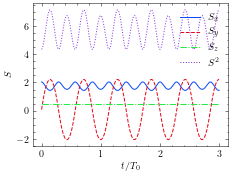

In [28]:
fig, ax = plt.subplots()
BMT(ax)

# T-BMT Model | d zeta / dt

In [19]:

def Eq_Motion_BMT_dzdt(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol
    

    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])
    
    E, B, _, _ = getField(x, t)
    
    F_Lorentz = E + np.cross(v, B)
    
#     # Lorentz force
#     flx = Ex + (vy*Bz-vz*By)
#     fly = Ey + (vz*Bx-vx*Bz)
#     flz = Ez + (vx*By-vy*Bx)
    
    
    beta = np.array([vx/c,vy/c,vz/c])
#     s = np.array([sx,sy,sz])
 
    p = np.array([px,py,pz])*m_e
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    
    s = np.array([sx,sy,sz])
    
    #d zeta / dt
    dadt = (-e)/(gam*m_e)*np.cross(s,B) + (-e)/((gam+1)*m_e)*np.cross(s,np.cross(E/c,beta))
    
    dSx_dt = dadt[0]
    dSy_dt = dadt[1]
    dSz_dt = dadt[2]
    
    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2
    
    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def BMT_dzdt(ax):
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0,-p0,  gam0,0.0,1.0,0.0)

    track = odeint(Eq_Motion_BMT_dzdt, init_cond2, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    print(list_sx.shape)
    # list_gamma = [gamma(list_px[i],list_py[i],list_pz[i]) for i in range(time.shape[0])]
    # list_theta = [abs(np.arctan(list_py[i]/list_pz[i])*180/3.1415) for i in range(37000)]
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)

    plot(
         list_x ,list_y ,list_z,
         list_px,list_py,list_pz,
         list_sx,list_sy,list_sz,
        'BMT',ax
        )

(1000,)


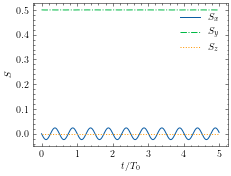

In [149]:
fig, ax = plt.subplots()
BMT_dzdt(ax)

# Volkov-Gan Model

In [4]:

def Eq_Motion_Volkov_Gan(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol
    
    global store_first_order,store_second_order

    E, B, A, k = getField(x,t)

    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])
    
    # Lorentz force
    F_Lorentz = E + np.cross(v, B)
    
    
    beta = np.array([vx/c,vy/c,vz/c])

#     p = np.array([px,py,pz])*m_e
    p = p0*m_e
    #k = np.array([0, 0, wn/c])
    
    
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    K = np.concatenate(([wn/c],  k))

    
    kp = contract(K,P)
    store_kp.append(kp)
    coeff1 = m_e*wn*gam/kp
    #coeff1 = m_e*wn/kp
    #print(coeff1)
    
#     zeta = np.array([sx,sy,sz])
#     s = zeta + p*p.dot(zeta)/(m_e*(Ekin+m_e))
    
    s = np.array([sx,sy,sz])
 
    dadt = (-e)/(gam*m_e)*(np.cross(s,B) + s.dot(beta)*E/c)
    dadt = coeff1*dadt
    
    first_order = dadt
    store_first_order.append(first_order)
    
    second_order = 2*wn*e**2*A.dot(A)*(-np.dot(s,k)+np.dot(v,s)*wn/c**2)*k/(kp**2)/c**2/gam
    store_second_order.append(second_order)
    

    dSx_dt = dadt[0] + second_order[0]
    dSy_dt = dadt[1] + second_order[1]
    dSz_dt = dadt[2] + second_order[2]
    
    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2
    
    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def Volkov_Gan():
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, -p0, gam0,0.0,1.0,0.0)
    # S0 = np.array([0.0,0.0,0.5])
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,0.0,1.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,1.,0.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,1.0,0.0,0.)
    from collections import deque
    
    global store_first_order
    store_first_order = deque([])
    global store_second_order
    store_second_order = deque([])
    global store_kp
    store_kp = deque([])
    track = odeint(Eq_Motion_Volkov_Gan, init_cond, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)

    plot(
         list_x ,list_y ,list_z,
         list_px,list_py,list_pz,
         list_sx,list_sy,list_sz,
        )

/home/merlin/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


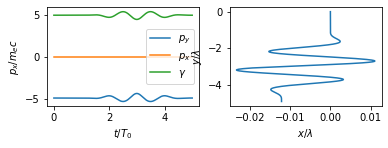

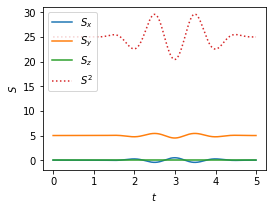

In [270]:
Volkov_Gan()

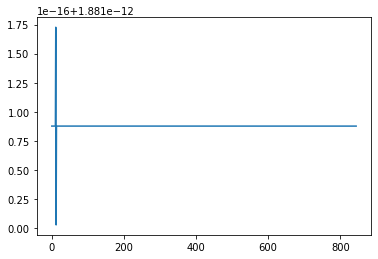

In [271]:
plt.plot(store_kp)

(728, 3)

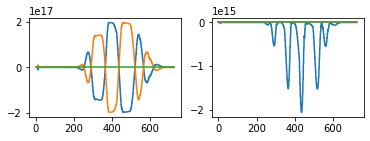

In [60]:
plt.subplot(221)
plt.plot(np.array(store_first_order))
plt.subplot(222)
plt.plot(store_second_order)
np.asarray(store_second_order).shape


# Volkov method

In [17]:
# k = np.array([-wn, 0, 0, wn/c])
# k = np.array([-wn/c, wn/c, 0, 0])
# def getPsi(px,py,pz,z,i):
# def getPsi(i,z):
def getPsi(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e
#     p = np.array([p0[0],p0[1],p0[2]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A4 = np.concatenate(([0.], A)) # convert 3d to 4d
    A4 = A4.real
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A4))/(2*kp)
#     print(np.matmul(coeff.conj(),coeff))
#     coeff = np.identity(4)+e*np.matmul(slash(P),slash(A))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
#     chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # 
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     psi = psi_m


    return psi

# #====================== INTEGRAl ===========================

# M = 2e-22
# a, b = nquad(getPsi,[[-M,M],[-M,M],[-M,M]],args=(10,))
# a, b = nquad(getPsi,[[-np.inf,np.inf],[-np.inf,np.inf],[-np.inf,np.inf]],args=(10,))
# #===========================================================

# #================= FOR TEST PURPOSE ========================
# # plt.plot(time,list_py/3e8)
# # plt.plot(time,list_pz/3e8)
# plt.plot(time,list_py*m_e)
# plt.plot(time,list_pz*m_e)

# plt.show()
# #===========================================================

# #================== Wavepacket distribution ================
# z = np.linspace(-lam,lam,1000)
# i = 100
# psi2 = [getPsi(0,0,0.5*m_e*c,iz,i) for iz in z]
# # print(psi2)
# plt.plot(z/lam,psi2)
# #===========================================================


#========== Spin Expectation Value =======================
def getS(psi):
    Sx = np.matmul(psi.conj().T, np.matmul(Sigma_x, psi))
    Sy = np.matmul(psi.conj().T, np.matmul(Sigma_y, psi))
    Sz = np.matmul(psi.conj().T, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
    norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
#     norm = np.matmul(psi.conj(),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm])

def Volkov():
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    S = np.vstack([getS(getPsi(it,x,y,z,px,py,pz,time)) for it in range(len(time))])
#     S = np.vstack([getS(getPsi(it,x,y,z,px,py,pz,time)) for it in [0]])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        )
    
#     plt.figure()
#     plt.plot(S[:,3])
#=========================================================

/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


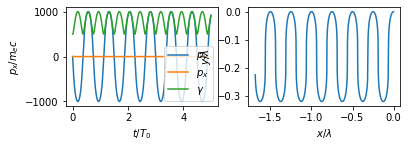

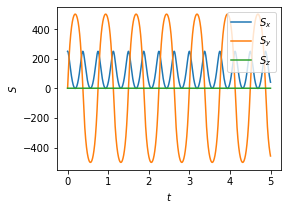

In [142]:
Volkov()

# Parameter

In [31]:
################################################################################################
# Constants
bn2=1 # for offset for radiation reaction

# qe = 4.8e-10
# me = 9.1e-28
# c=2.9979e10
# qe = e
# me = m_e
# c = c

w_au2si = 4.13e16
wn = 10*w_au2si
# w_si2gauss =

# lam = 1e-6
# wn = 2*pi*c/lam


# a0 = 7.5e11*e/(m_e*omega*3e8)
# a0 = 10000 / 137 /137
# a0 = 800 / 137 / 10
a0 = 0.5
# a0 = 0.84
# a0 = 0.5
# a0 = 200
print("a0: ",a0)
g_factor = 2.0

# wn = 2*np.pi*c/(1e-4)
kn = wn/c
lam = 2*pi/kn
B0 = a0*m_e*wn/e
E0 = a0*m_e*c*wn/e
A0 = a0*m_e*c/e
re = e*e/(m_e*c*c)/(4*pi*epsilon_0)
E_s = m_e**2*c**3/(e*hbar)
lambda_c = hbar/(m_e*c)

T0 = 2*pi/wn
delta = c/wn

tend = 10*T0

gam0 = 1.
beta0 = np.sqrt(1-1/(gam0*gam0))
mag_p0 = gam0*c*beta0   # CAUTION: this is p/m
# p0 = np.array([-mag_p0,0.0,  0.0])
theta_p = pi/4 # theta \in [0, pi]
phi_p   = pi*5/6 # phi \in [0, 2*pi]
p0 = np.array([np.sin(theta_p)*np.cos(phi_p),np.sin(theta_p)*np.sin(phi_p),np.cos(theta_p)])*mag_p0

theta = pi/2 # theta \in [0, pi]
phi   = 0 #pi/2 # phi \in [0, 2*pi]

zeta = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
s = zeta + p0*p0.dot(zeta)/(c**2*(gam0+1))
print(zeta)
print(s)

time = np.arange(0,tend,tend/1000.0)    
# init_cond = (0.0, 0.0, 0.0,-p0, 0.0, 0.0, gam0,0.0,1.0,0.0)
init_cond = (0.0, 0.0, 0.0,  p0[0], p0[1], p0[2], gam0,s[0],s[1],s[2])
# tend = 10*T0
# tend = 16*B0*qe/wn
# print(tend)
################################################

a0:  0.5
[1.000000e+00 0.000000e+00 6.123234e-17]
[1.000000e+00 0.000000e+00 6.123234e-17]


# RUN

(1000,)


/home/merlin/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/home/merlin/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/home/merlin/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


[(3, 1000)]
(1000, 3)


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


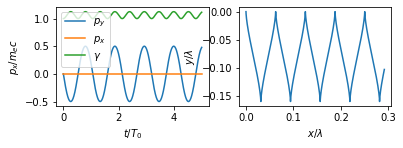

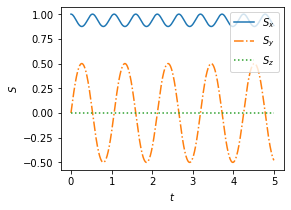

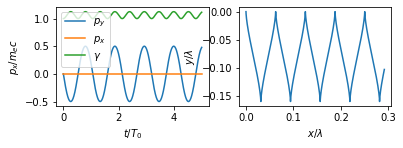

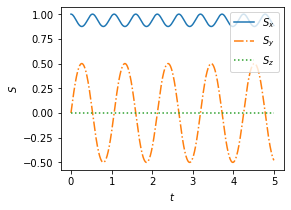

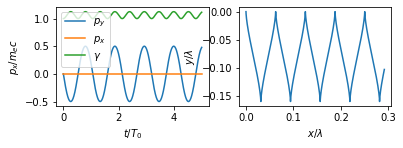

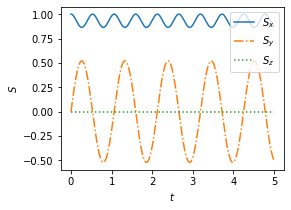

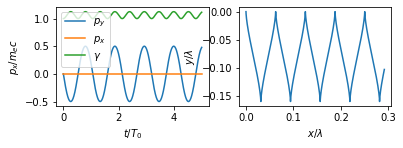

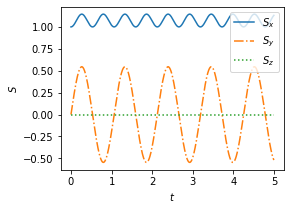

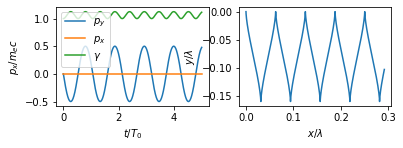

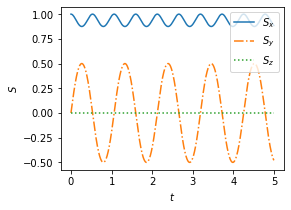

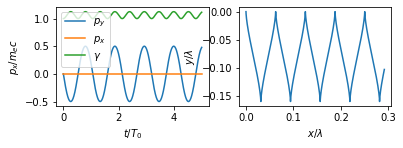

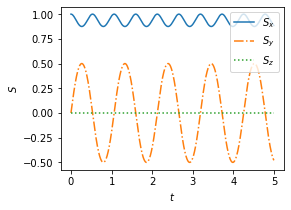

In [185]:
BMT()
BMT_kA()
#print("=============")
Volkov_Gan()
Volkov_Gan_kA()
Volkov()
Eq12()

In [221]:
2*pi*c/2/4.e16

2.3545644591360665e-08

In [74]:
e

1.6021766208e-19

In [95]:
0.05**(-3/4)

9.457416090031758

In [96]:
e

1.6021766208e-19

# Volkov test

In [15]:
# k = np.array([-wn, 0, 0, wn/c])
# k = np.array([-wn/c, wn/c, 0, 0])
# def getPsi(px,py,pz,z,i):
# # def getPsi(i,z):
# def getPsi(i, x, y, z, px, py, pz, time):
#     z = z[i]
#     x = x[i]
# #     print(z)
#     t = time[i]
    
# #     p = np.array([px[i],py[i],pz[i]])*m_e
#     p = np.array([px[0],py[0],pz[0]])*m_e
    

#     mag_p = np.sqrt(p.dot(p))
#     Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    
#     P = np.concatenate(([Ekin/c],p))
#     _, _, A, k = getField(x, t)
# #     print(A)
#     K = np.concatenate(([wn/c],  k))
    
#     kp = contract(K,P)
#     A = np.concatenate(([0.], A)) # convert 3d to 4d
#     A = A.real
# #     print(A)
#     coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
#     coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
# #     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
# #    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
# #    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

#     #chi_p = np.array([1.0, 0.0])
#     #chi_m = np.array([0.0, 1.0])
#     chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
# #     print(theta)
# #     print(phi)
# #     print(chi_p)
# #     print(coeff)
# #     print(chi_p)
#     chi_m = np.array([0.0, 1.0])
    
# #     norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
# #     print(u_p)
# #     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

#     psi_p = np.matmul(coeff,u_p) # x up
# #     psi_m = np.matmul(coeff,u_m) # x down
# #     psi = (psi_m + psi_p)/np.sqrt(2) # z down
# #     psi = (psi_m - psi_p)/np.sqrt(2) # z up
# #     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
# #     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
#     psi = psi_p
# #     print(psi)
# #     psi = psi_m
#     if i<=2:
#         print(psi)


#     return psi, u_p, coeff, coeff_conj

# #====================== INTEGRAl ===========================

# M = 2e-22
# a, b = nquad(getPsi,[[-M,M],[-M,M],[-M,M]],args=(10,))
# a, b = nquad(getPsi,[[-np.inf,np.inf],[-np.inf,np.inf],[-np.inf,np.inf]],args=(10,))
# #===========================================================

# #================= FOR TEST PURPOSE ========================
# # plt.plot(time,list_py/3e8)
# # plt.plot(time,list_pz/3e8)
# plt.plot(time,list_py*m_e)
# plt.plot(time,list_pz*m_e)

# plt.show()
# #===========================================================

# #================== Wavepacket distribution ================
# z = np.linspace(-lam,lam,1000)
# i = 100
# psi2 = [getPsi(0,0,0.5*m_e*c,iz,i) for iz in z]
# # print(psi2)
# plt.plot(z/lam,psi2)
# #===========================================================


#========== Spin Expectation Value =======================
def getS(psi):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
#     print(psi)
    Sx = np.matmul(psi.conj(), np.matmul(Sigma_x/2, psi))
    Sy = np.matmul(psi.conj(), np.matmul(Sigma_y/2, psi))
    Sz = np.matmul(psi.conj(), np.matmul(Sigma_z/2, psi))
    
#     psi_bar = np.matmul(psi.conj(),gamma0)
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x/2, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y/2, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z/2, psi))
    
    Sigma_2 = np.matmul(Sigma_x/2,Sigma_x/2)+ np.matmul(Sigma_z/2,Sigma_z/2)+ np.matmul(Sigma_z/2,Sigma_z/2)
    S_2 = np.matmul(psi.conj(), np.matmul(Sigma_2, psi))
    
#     print(Sigma_x)
#     print(Sigma_y)
#     print(Sigma_z)
#     Sx = np.matmul(psi.conj(), np.matmul(np.identity(4), psi))
#     Sy = np.matmul(psi.conj(), np.matmul(np.identity(4), psi))
#     Sz = np.matmul(psi.conj(), np.matmul(np.identity(4), psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm1 = np.matmul(np.matmul(psi.conj(),gamma0),psi)
    norm2 = np.matmul(psi.conj(),psi)
#     norm1 = np.matmul(np.matmul(u.conj(),gamma0),u)
#     norm2 = np.matmul(u.conj(),u)
#     return np.array([Sx, Sy, Sz])/norm
#     print(np.outer(psi,psi_bar))
    S2 = np.matmul(psi_bar,np.matmul(np.identity(4)*0.75,psi))
    return np.array([Sx, Sy, Sz, norm1,norm2,S2,S_2])
#     return np.array([Sx, Sy, Sz])

def Volkov(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    
    S = np.vstack([getS(getPsi(it,x,y,z,px,py,pz,time)) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'Volkov',ax
        )
#     print(S[0,0],S[0,1],S[0,2])
#     print(S[0,0]**2+S[0,1]**2+S[0,2]**2)
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,3])
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,4])
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,5])
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,6])
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

(1000,)
(1000,)
[(3, 1000)]
(0.20385867396388382+0j) (0.7419848931983218+0j) (4.504844339512098+0j)
(20.885722463919027+0j)


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

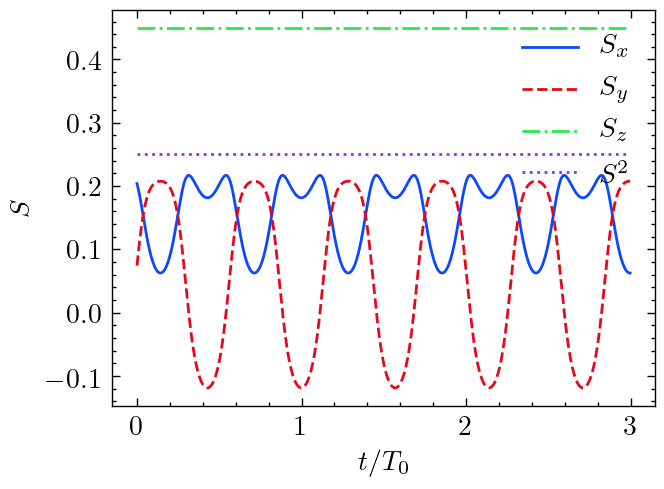

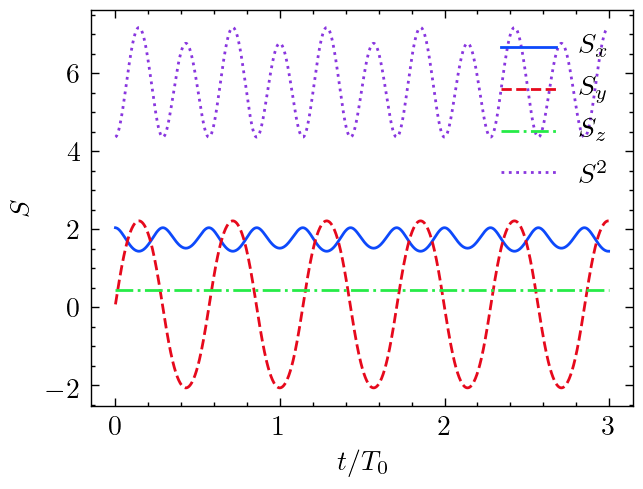

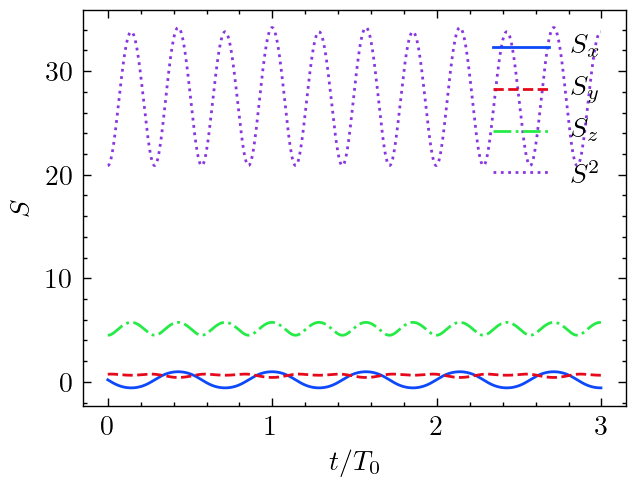

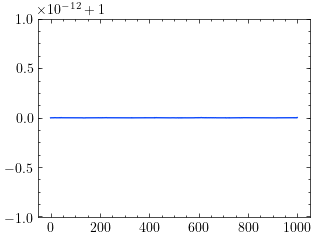

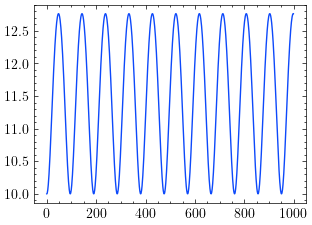

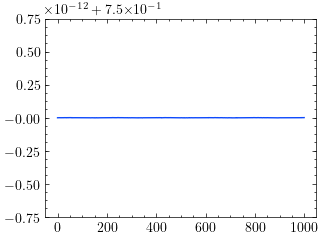

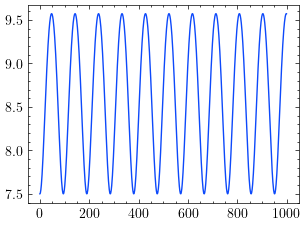

In [183]:
fig, ax = plt.subplots(dpi=200)
BMT_dzdt(ax)
fig, ax = plt.subplots(dpi=200)
BMT(ax)
fig, ax = plt.subplots(dpi=200)
Volkov(ax)

In [22]:
print(np.identity(4)*0.75)
print(np.matmul(Sigma_x/2,Sigma_x/2)+np.matmul(Sigma_y/2,Sigma_y/2)+np.matmul(Sigma_z/2,Sigma_z/2))

[[0.75 0.   0.   0.  ]
 [0.   0.75 0.   0.  ]
 [0.   0.   0.75 0.  ]
 [0.   0.   0.   0.75]]
[[0.75+0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.75+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.75+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.75+0.j]]


# Volkov-Gan test | dadt | using k and A

In [73]:
def Eq_Motion_Volkov_Gan_kA(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol
    
    global store_first_order,store_second_order

    E, B, A, k = getField(x,t)

    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])
    
    # Lorentz force
    F_Lorentz = E + np.cross(v, B)
    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2
    
    
    

#     p = np.array([px,py,pz])*m_e
    p = p0*m_e
    beta = p0/gam0/c
    #k = np.array([0, 0, wn/c])
    
    
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    K = np.concatenate(([wn/c],  k))

    
    kp = contract(K,P)
    store_kp.append(gam)
    
#     zeta = np.array([sx,sy,sz])
#     s = zeta + p*p.dot(zeta)/(m_e*(Ekin+m_e))
    
    s = np.array([sx,sy,sz])
    
    store_kxA.append(1j*np.cross(k,A))
    store_A.append(A)
#     dadt = - 1j*(-e)/(gam*m_e)*(s.dot(k)*A - s.dot(A)*k - s.dot(beta)*wn/c*A)
    dadt = - 1j*(-e)/(gam0*m_e)*(s.dot(k)*A - s.dot(A)*k - s.dot(beta)*kn*A) # initial velocity
#     dadt = - 1j*(-e)/(gam *m_e)*(s.dot(k)*A - s.dot(A)*k - s.dot(beta)*wn/c*A) # TBMT
#     dadt = (-e)/(gam*m_e)*(np.cross(s,B) + s.dot(beta)*E/c)
#     dadt = coeff1*dadt
    
#     first_order = dadt
    store_first_order.append(dadt)
    
#     second_order = 1j*e**2*A.dot(A)*(-np.dot(s,k)+np.dot(v,s)*wn/c**2)*k/(kp)/gam/m_e
    second_order = 1j*e**2*A.dot(A)*(-s.dot(k)+beta.dot(s)*kn)*k/(kp)/gam0/m_e # initial velocity
    store_second_order.append(second_order)
    

    dSx_dt = dadt[0] + second_order[0]
    dSy_dt = dadt[1] + second_order[1]
    dSz_dt = dadt[2] + second_order[2]
    
    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def Volkov_Gan_kA():
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, -p0, gam0,0.0,1.0,0.0)
    # S0 = np.array([0.0,0.0,0.5])
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,0.0,1.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,1.,0.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,1.0,0.0,0.)
    from collections import deque
    
    global store_first_order
    store_first_order = deque([])
    global store_second_order
    store_second_order = deque([])
    global store_kp
    store_kp = deque([])
    global store_kxA
    store_kxA = deque([])
    global store_A
    store_A = deque([])
    track = odeint(Eq_Motion_Volkov_Gan_kA, init_cond, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)

    plot(
         list_x ,list_y ,list_z,
         list_px,list_py,list_pz,
         list_sx,list_sy,list_sz,
        )

/home/merlin/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


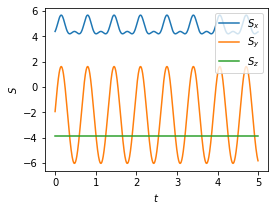

In [74]:
Volkov_Gan_kA()

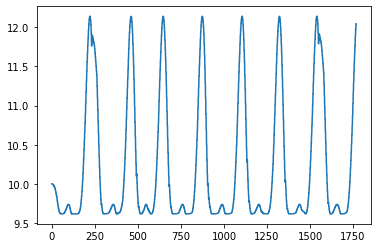

In [75]:
plt.plot(store_kp)

/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1769, 3)

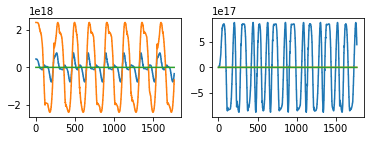

In [76]:
plt.subplot(221)
plt.plot(np.array(store_first_order))
plt.subplot(222)
plt.plot(store_second_order)
np.asarray(store_second_order).shape


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


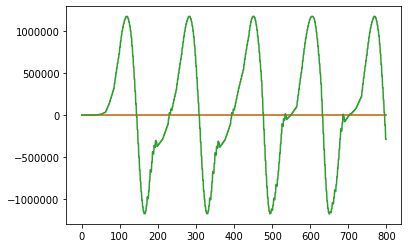

In [59]:
plt.plot(store_kxA)


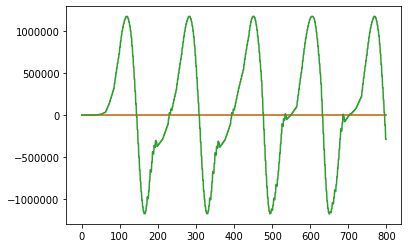

In [60]:
plt.plot(store_B)

# Volkov-Gan test | Eq12 | using k and A

In [ ]:
# 为啥是平的。。。


In [29]:
def calc_ai(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

#     print(p/m_e/c)
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
    A = A.real
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
#     nonlocal a_i_prev
#     if i == 0: 
#         return s
#     else:
#         s
    bracket1 = s
    bracket2 = (-e)/kp*((s.dot(k)*A-s.dot(A)*k) + s.dot(p)*c/Ekin*(k*0-kn*A))
#     print(k*0)
    bracket3 = e**2*A.dot(A)*k/(kp**2)*(-s.dot(k)+kn*s.dot(p)*c/Ekin)/2
    bracket = bracket1 + bracket2 + bracket3
    store_bra1.append(bracket1)
    store_bra2.append(bracket2)
    store_bra3.append(bracket3)
    store_kp.append(Ekin)
#     print(A)
    a_i = bracket
    
    return a_i

def Eq12():
    from collections import deque
    
    global store_bra1
    store_bra1 = deque([])
    global store_bra2
    store_bra2 = deque([])
    global store_bra3
    store_bra3 = deque([])
    global store_kp
    store_kp = deque([])
    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    
    S = np.vstack([calc_ai(it,x,y,z,px,py,pz,time) for it in range(len(time))])
    print(S.shape)
    
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'Eq12',
        )

(1000, 3)


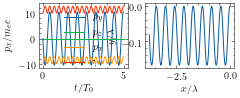

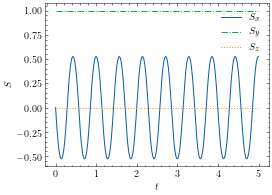

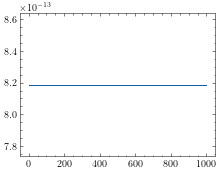

In [15]:
Eq12()
plt.figure()
plt.plot(store_kp)

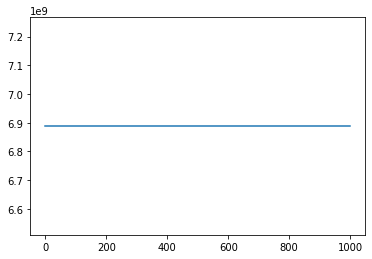

In [91]:
plt.plot(store_kp)

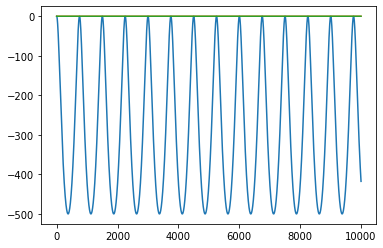

In [158]:
plt.plot(store_bra3)

In [79]:
plt.plot(S)

NameError: name 'S' is not defined

In [ ]:

class spin_precession:
    def __init__(self):
        traj = np.load('traj.npz')
        self.x = traj['x']
        self.y = traj['y']
        self.z = traj['z']
        self.px = traj['px']
        self.py = traj['py']
        self.pz = traj['pz']
        self.time = time
    
    def calc_ai(self, i):
        z = self.z[i]
        x = self.x[i]
        t = self.time[i]

    #     p = np.array([px[i],py[i],pz[i]])*m_e
        p = np.array([self.px[0],self.py[0],self.pz[0]])*m_e

        mag_p = np.sqrt(p.dot(p))
        Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
        P = np.concatenate(([Ekin/c],p))
        _, _, A, k = getField(x, t)
        A = A.real
    #     print(A)
        K = np.concatenate(([wn/c],  k))

        kp = contract(K,P)
    #     if i == 0: 
    #         return s
    #     else:
    #         s
    #     bracket1 = s
    #     bracket2 = (-e)/kp*((s.dot(k)*A-s.dot(A)*k) - s.dot(p)*c/Ekin*(k*0-kn*A))
    #     bracket3 = e**2*A.dot(A)*k/(kp**2)*(-s.dot(k)+kn*s.dot(p)*c/Ekin)
    #     bracket = bracket1 + bracket2 + bracket3
    #     a_i = bracket
        if i == 0:
            bracket1 = s
            bracket2 = (-e)/kp*((s.dot(k)*A-s.dot(A)*k) - s.dot(p)*c/Ekin*(k*0-kn*A))
            bracket3 = e**2*A.dot(A)*k/(kp**2)*(-s.dot(k)+kn*s.dot(p)*c/Ekin)
            bracket = bracket1 + bracket2 + bracket3
            a_i = bracket
        else:
            a_i_prev = self.calc_ai(i-1)
            bracket1 = a_i_prev
            bracket2 = (-e)/kp*((a_i_prev.dot(k)*A-a_i_prev.dot(A)*k) - a_i_prev.dot(p)*c/Ekin*(k*0-kn*A))
            bracket3 = e**2*A.dot(A)*k/(kp**2)*(-a_i_prev.dot(k)+kn*a_i_prev.dot(p)*c/Ekin)
            bracket = bracket1 + bracket2 + bracket3
            a_i = bracket
        return a_i
    



# T-BMT test | dadt | using k and A

In [26]:
def Eq_Motion_BMT_kA(sol,t,bns):
    x, y, z, px, py, pz, gam, sx,sy,sz = sol
    
    global store_first_order,store_second_order

    E, B, A, k = getField(x,t)

    # motion

    vx = px/gam
    vy = py/gam
    vz = pz/gam
    v = np.array([vx,vy,vz])
    
    # Lorentz force
    F_Lorentz = E + np.cross(v, B)
    
    
    beta = np.array([vx/c,vy/c,vz/c])

#     p = np.array([px,py,pz])*m_e
    p = p0*m_e
    #k = np.array([0, 0, wn/c])
    
    
    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    K = np.concatenate(([wn/c],  k))

    
    kp = contract(K,P)
    store_kp.append(kp)
    coeff1 = m_e*wn*gam/kp
    #coeff1 = m_e*wn/kp
    #print(coeff1)
    
#     zeta = np.array([sx,sy,sz])
#     s = zeta + p*p.dot(zeta)/(m_e*(Ekin+m_e))
    
    s = np.array([sx,sy,sz])
    
    store_kxA.append(1j*np.cross(k,A))
    store_A.append(A)
    dadt = - 1j*(-e)/(gam*m_e)*(s.dot(k)*A - s.dot(A)*k - s.dot(beta)*wn/c*A)
#     dadt = (-e)/(gam*m_e)*(np.cross(s,B) + s.dot(beta)*E/c)
    dadt = dadt
    
    first_order = dadt
    store_first_order.append(first_order)
    
    second_order = 2*wn*e**2*A.dot(A)*(-np.dot(s,k)+np.dot(v,s)*wn/c**2)*k/(kp**2)/c**2/gam
    store_second_order.append(second_order)
    

    dSx_dt = dadt[0] #+ second_order[0]
    dSy_dt = dadt[1] #+ second_order[1]
    dSz_dt = dadt[2] #+ second_order[2]
    
    dx_dt  =   vx
    dy_dt  =   vy
    dz_dt  =   vz
    dpx_dt =   -e*F_Lorentz[0]/m_e
    dpy_dt =   -e*F_Lorentz[1]/m_e
    dpz_dt =   -e*F_Lorentz[2]/m_e
    dgamma_dt = -e*(v.dot(E))/m_e/c**2
    
    return (dx_dt, dy_dt, dz_dt, dpx_dt, dpy_dt, dpz_dt,dgamma_dt, dSx_dt,dSy_dt,dSz_dt)

def BMT_kA():
    #time = np.arange(0,tend,tend/1000.0)

    #init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, -p0, gam0,0.0,1.0,0.0)
    # S0 = np.array([0.0,0.0,0.5])
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,0.0,1.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,0.0,1.,0.)
    # init_cond = (0.0, 0.0, 0.0, 0.0, 0.0, 0,1.0,1.0,0.0,0.)
    from collections import deque
    
    global store_first_order
    store_first_order = deque([])
    global store_second_order
    store_second_order = deque([])
    global store_kp
    store_kp = deque([])
    global store_kxA
    store_kxA = deque([])
    global store_A
    store_A = deque([])
    track = odeint(Eq_Motion_BMT_kA, init_cond, time, args=(1,))

    list_x = track[:,0]
    list_y = track[:,1]
    list_z = track[:,2]

    list_px = track[:,3]
    list_py = track[:,4]
    list_pz = track[:,5]
    list_gam = track[:,6]
    list_sx = track[:,7]
    list_sy = track[:,8]
    list_sz = track[:,9]
    
    np.savez("traj.npz", x=list_x, y=list_y, z=list_z, px=list_px, py=list_py, pz=list_pz)

    plot(
         list_x ,list_y ,list_z,
         list_px,list_py,list_pz,
         list_sx,list_sy,list_sz,
        )

# Volkov test | x

In [12]:
# spin operator
def getSpinOperator_FW(p):
    """
    Input: Initial momentum divided by m_e
    Return: FW spin operator
    """
    alpha_x = np.matmul(gamma0,gamma1)
    alpha_y = np.matmul(gamma0,gamma2)
    alpha_z = np.matmul(gamma0,gamma3)
#     print(alpha_x, '\n',alpha_y, '\n', alpha_z)
#     print(gamma0,'\n',gamma1, '\n',gamma2, '\n', gamma3)
    p_0 = np.sqrt(p.dot(p)+c**2)
    pxalpha1 = p[1]*alpha_z - alpha_y*p[2]
    pxalpha2 = p[2]*alpha_x - alpha_z*p[0]
    pxalpha3 = p[0]*alpha_y - alpha_x*p[1]
    pxSigmaxp1 = p.dot(p)*Sigma_x - dotSigma(p)*p[0]
    pxSigmaxp2 = p.dot(p)*Sigma_y - dotSigma(p)*p[1]
    pxSigmaxp3 = p.dot(p)*Sigma_z - dotSigma(p)*p[2]
    Sigma_x_FW = Sigma_x/2 + 1j*np.matmul(gamma0,pxalpha1)/p_0/2 - pxSigmaxp1/(2*p_0*(p_0+c)) 
    Sigma_y_FW = Sigma_y/2 + 1j*np.matmul(gamma0,pxalpha2)/p_0/2 - pxSigmaxp2/(2*p_0*(p_0+c)) 
    Sigma_z_FW = Sigma_z/2 + 1j*np.matmul(gamma0,pxalpha3)/p_0/2 - pxSigmaxp3/(2*p_0*(p_0+c)) 
#     print(np.matmul(Sigma_x_FW,Sigma_x_FW)+np.matmul(Sigma_y_FW,Sigma_y_FW)+np.matmul(Sigma_z_FW,Sigma_z_FW))
#     print(Sigma_x_FW)
#     print(Sigma_y_FW)
#     print(Sigma_z_FW)
    return Sigma_x_FW, Sigma_y_FW, Sigma_z_FW

def getPsi(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A = np.concatenate(([0.], A)) # convert 3d to 4d
    A = A.real
#     print(A)
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
    coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(theta)
#     print(phi)
#     print(chi_p)
#     print(coeff)
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # x up
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     print(psi)
#     psi = psi_m

#     if i <= 2:
#         print(psi)

    return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_FW(psi, p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
#     coeff_conj = psi[3]
#     u_bar = np.matmul(u.conj(),gamma0)
#     psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
#     print(psi)
    S_FW_x, S_FW_y, S_FW_z = getSpinOperator_FW(p)
#     Sx = np.matmul(psi.conj(), np.matmul(S_FW_x, psi))
#     Sy = np.matmul(psi.conj(), np.matmul(S_FW_y, psi))
#     Sz = np.matmul(psi.conj(), np.matmul(S_FW_z, psi))
    
    
    psi_bar = np.matmul(psi.conj(),gamma0)
    Sx = np.matmul(psi_bar, np.matmul(S_FW_x, psi))
    Sy = np.matmul(psi_bar, np.matmul(S_FW_y, psi))
    Sz = np.matmul(psi_bar, np.matmul(S_FW_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
#     norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
    norm = np.matmul(psi.conj(),psi)
#     print(norm)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_FW(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    #print(p.shape)
    S = np.vstack([getS_FW(getPsi(it,x,y,z,px,py,pz,time),p[:,it]) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'FW',ax
        )
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,3])
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

# Volkov test | FW

In [13]:
# spin operator
def getSpinOperator_FW(p):
    """
    Input: Initial momentum divided by m_e
    Return: FW spin operator
    """
    alpha_x = np.matmul(gamma0,gamma1)
    alpha_y = np.matmul(gamma0,gamma2)
    alpha_z = np.matmul(gamma0,gamma3)
#     print(alpha_x, '\n',alpha_y, '\n', alpha_z)
#     print(gamma0,'\n',gamma1, '\n',gamma2, '\n', gamma3)
    p_0 = np.sqrt(p.dot(p)+c**2)
    pxalpha1 = p[1]*alpha_z - alpha_y*p[2]
    pxalpha2 = p[2]*alpha_x - alpha_z*p[0]
    pxalpha3 = p[0]*alpha_y - alpha_x*p[1]
    pxSigmaxp1 = p.dot(p)*Sigma_x - dotSigma(p)*p[0]
    pxSigmaxp2 = p.dot(p)*Sigma_y - dotSigma(p)*p[1]
    pxSigmaxp3 = p.dot(p)*Sigma_z - dotSigma(p)*p[2]
    Sigma_x_FW = Sigma_x/2 + 1j*np.matmul(gamma0,pxalpha1)/p_0/2 - pxSigmaxp1/(2*p_0*(p_0+c)) 
    Sigma_y_FW = Sigma_y/2 + 1j*np.matmul(gamma0,pxalpha2)/p_0/2 - pxSigmaxp2/(2*p_0*(p_0+c)) 
    Sigma_z_FW = Sigma_z/2 + 1j*np.matmul(gamma0,pxalpha3)/p_0/2 - pxSigmaxp3/(2*p_0*(p_0+c)) 
#     print(np.matmul(Sigma_x_FW,Sigma_x_FW)+np.matmul(Sigma_y_FW,Sigma_y_FW)+np.matmul(Sigma_z_FW,Sigma_z_FW))
#     print(Sigma_x_FW)
#     print(Sigma_y_FW)
#     print(Sigma_z_FW)
    return Sigma_x_FW, Sigma_y_FW, Sigma_z_FW

def getPsi(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A = np.concatenate(([0.], A)) # convert 3d to 4d
    A = A.real
#     print(A)
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
    coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(theta)
#     print(phi)
#     print(chi_p)
#     print(coeff)
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # x up
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     print(psi)
#     psi = psi_m

#     if i <= 2:
#         print(psi)

    return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_FW(psi, p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
#     coeff_conj = psi[3]
#     u_bar = np.matmul(u.conj(),gamma0)
#     psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
#     print(psi)
    S_FW_x, S_FW_y, S_FW_z = getSpinOperator_FW(p)
    Sx = np.matmul(psi.conj(), np.matmul(S_FW_x, psi))
    Sy = np.matmul(psi.conj(), np.matmul(S_FW_y, psi))
    Sz = np.matmul(psi.conj(), np.matmul(S_FW_z, psi))
    
    
#     psi_bar = np.matmul(psi.conj(),gamma0)
#     Sx = np.matmul(psi_bar, np.matmul(S_FW_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(S_FW_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(S_FW_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
#     norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
    norm = np.matmul(psi.conj(),psi)
#     print(norm)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_FW(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    #print(p.shape)
    S = np.vstack([getS_FW(getPsi(it,x,y,z,px,py,pz,time),p[:,it]) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'FW',ax
        )
#     fig, ax = plt.subplots(dpi=100)
#     plt.plot(S[:,3])
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

(1000,)
[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


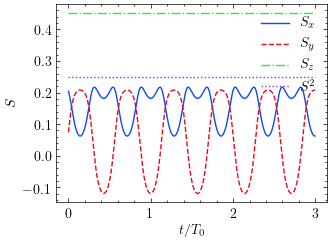

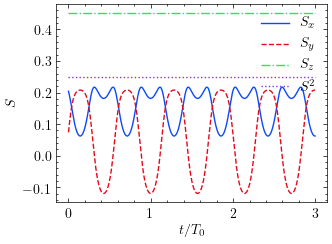

In [33]:
fig, ax = plt.subplots(dpi=100)
BMT_dzdt(ax)
fig, ax = plt.subplots(dpi=100)
Volkov_FW(ax)

In [110]:
getSpinOperator_FW(np.zeros(3))

(array([[0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
        [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
        [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j]]),
 array([[0.+0.j , 0.-0.5j, 0.+0.j , 0.+0.j ],
        [0.+0.5j, 0.+0.j , 0.+0.j , 0.+0.j ],
        [0.+0.j , 0.+0.j , 0.+0.j , 0.-0.5j],
        [0.+0.j , 0.+0.j , 0.+0.5j, 0.+0.j ]]),
 array([[ 0.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
        [ 0. +0.j, -0.5+0.j,  0. +0.j,  0. +0.j],
        [ 0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j],
        [ 0. +0.j,  0. +0.j,  0. +0.j, -0.5+0.j]]))

In [90]:
3* np.ones((3,3))

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

# Volkov test | FW | Eq. (34) in Zou et al.

In [187]:
# spin operator
def getSpinOperator_FW_Eq34(p):
    """
    Input: Initial momentum divided by m_e
    Return: FW spin operator
    """

    lorentz_factor = np.sqrt(p.dot(p)/c**2+1)
    

    gamxp1 = gamma2*p[2] - gamma3*p[1]
    gamxp2 = gamma3*p[0] - gamma1*p[2]
    gamxp3 = gamma1*p[1] - gamma2*p[0]
    sigmadp = Sigma_x*p[0] + Sigma_y*p[1] + Sigma_z*p[2]
    Sigma_x_FW = Sigma_x/(2*lorentz_factor) - 1j*gamxp1/(2*lorentz_factor*c) + p[0]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 
    Sigma_y_FW = Sigma_y/(2*lorentz_factor) - 1j*gamxp2/(2*lorentz_factor*c) + p[1]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 
    Sigma_z_FW = Sigma_z/(2*lorentz_factor) - 1j*gamxp3/(2*lorentz_factor*c) + p[2]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 
#     Sigma_x_FW = np.identity(4)
#     Sigma_y_FW = np.identity(4)
#     Sigma_z_FW = np.identity(4)
#     Sigma_x_FW = - 1j*gamxp1/(2*lorentz_factor*c)
#     Sigma_y_FW = - 1j*gamxp2/(2*lorentz_factor*c)
#     Sigma_z_FW = - 1j*gamxp3/(2*lorentz_factor*c)
#     Sigma_x_FW = Sigma_x/(2*lorentz_factor)
#     Sigma_y_FW = Sigma_y/(2*lorentz_factor)
#     Sigma_z_FW = Sigma_z/(2*lorentz_factor)
#     Sigma_x_FW = gamma1
#     Sigma_y_FW = gamma2
#     Sigma_z_FW = gamma3
#     Sigma_x_FW =  p[0]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2)
#     Sigma_y_FW =  p[1]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2)
#     Sigma_z_FW =  p[2]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2)
#     print(gamma1,gamma2,gamma3)
    return Sigma_x_FW, Sigma_y_FW, Sigma_z_FW

# def getPsi(i, x, y, z, px, py, pz, time):
#     z = z[i]
#     x = x[i]
# #     print(z)
#     t = time[i]
    
# #     p = np.array([px[i],py[i],pz[i]])*m_e
#     p = np.array([px[0],py[0],pz[0]])*m_e

#     mag_p = np.sqrt(p.dot(p))
#     Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
#     P = np.concatenate(([Ekin/c],p))
#     _, _, A, k = getField(x, t)
# #     print(A)
#     K = np.concatenate(([wn/c],  k))
    
#     kp = contract(K,P)
#     A = np.concatenate(([0.], A)) # convert 3d to 4d
#     A = A.real
# #     print(A)
#     coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
#     coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
# #     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
# #    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
# #    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

#     #chi_p = np.array([1.0, 0.0])
#     #chi_m = np.array([0.0, 1.0])
#     chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
# #     print(theta)
# #     print(phi)
# #     print(chi_p)
# #     print(coeff)
# #     print(chi_p)
#     chi_m = np.array([0.0, 1.0])
    
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
# #     norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#     u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
# #     print(u_p)
# #     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

#     psi_p = np.matmul(coeff,u_p) # x up
# #     psi_m = np.matmul(coeff,u_m) # x down
# #     psi = (psi_m + psi_p)/np.sqrt(2) # z down
# #     psi = (psi_m - psi_p)/np.sqrt(2) # z up
# #     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
# #     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
#     psi = psi_p
# #     print(psi)
# #     psi = psi_m


#     return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_FW_Eq34(psi, p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_FW_x, S_FW_y, S_FW_z = getSpinOperator_FW_Eq34(p)
    Sx = np.matmul(psi.conj(), np.matmul(S_FW_x, psi))
    Sy = np.matmul(psi.conj(), np.matmul(S_FW_y, psi))
    Sz = np.matmul(psi.conj(), np.matmul(S_FW_z, psi))
#     psi_bar = np.matmul(psi.conj(),gamma0)
#     Sx = np.matmul(psi_bar, np.matmul(S_FW_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(S_FW_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(S_FW_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    S0 = np.matmul(psi_bar, np.matmul(gamma0, psi))
#     print(S0)
#     print(np.sqrt(p.dot(p)/c**2+1))
#     norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
    norm = np.matmul(psi.conj(),psi)
#     print(norm)
#     return np.array([Sx, Sy, Sz])/norm
#     print(Sx,Sy,Sz)
#     print(p/c)
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_FW_Eq34(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    #print(p.shape)
    S = np.vstack([getS_FW_Eq34(getPsi(it,x,y,z,px,py,pz,time),p[:,it]) for it in range(len(time))])
#     print(np.sqrt(p[:,0].dot(p[:,0])/c**2+1))
#     print(gamma1)
#     print(gamma2)
#     print(gamma3)
#     print(Sigma_x)
#     print(Sigma_y)
#     print(Sigma_z)
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'FW_Eq34',ax
        )
    fig, ax = plt.subplots(dpi=100)
    plt.plot(S[:,3])
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

(1000,)
[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

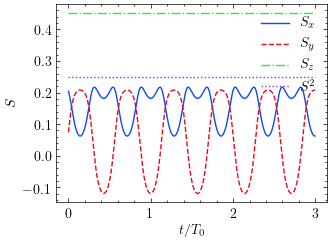

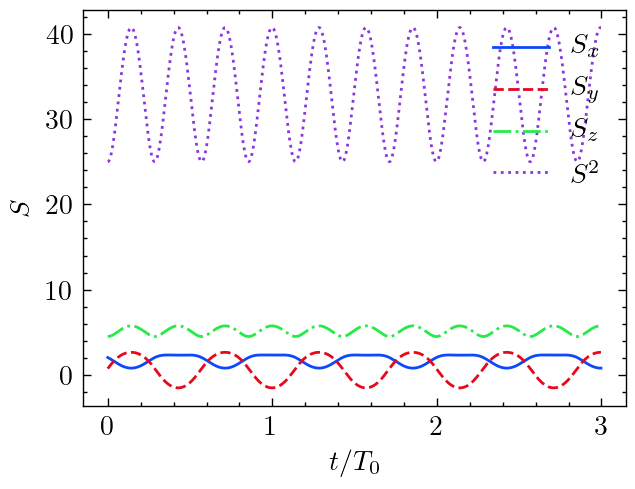

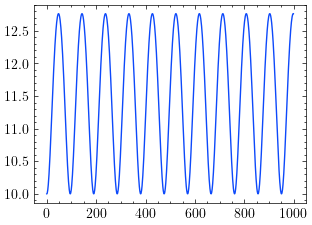

In [188]:
fig, ax = plt.subplots(dpi=100)
BMT_dzdt(ax)
fig, ax = plt.subplots(dpi=200)
Volkov_FW_Eq34(ax)

# Volkov test | FW | Eq. (34) in Zou et al.| no update

In [25]:
# spin operator
def getSpinOperator_FW_Eq34_noupdate(p):
    """
    Input: Initial momentum divided by m_e
    Return: FW spin operator
    """

    lorentz_factor = np.sqrt(p.dot(p)/c**2+1)
    

    gamxp1 = gamma2*p[2] - gamma3*p[1]
    gamxp2 = gamma3*p[0] - gamma1*p[2]
    gamxp3 = gamma1*p[1] - gamma2*p[0]
    sigmadp = Sigma_x*p[0] + Sigma_y*p[1] + Sigma_z*p[2]
    Sigma_x_FW = Sigma_x/(2*lorentz_factor) - 1j*gamxp1/(2*lorentz_factor*c) + p[0]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 
    Sigma_y_FW = Sigma_y/(2*lorentz_factor) - 1j*gamxp2/(2*lorentz_factor*c) + p[1]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 
    Sigma_z_FW = Sigma_z/(2*lorentz_factor) - 1j*gamxp3/(2*lorentz_factor*c) + p[2]*sigmadp/(2*lorentz_factor*(lorentz_factor+1)*c**2) 

    return Sigma_x_FW, Sigma_y_FW, Sigma_z_FW

# def getPsi(i, x, y, z, px, py, pz, time):
#     z = z[i]
#     x = x[i]
# #     print(z)
#     t = time[i]
    
# #     p = np.array([px[i],py[i],pz[i]])*m_e
#     p = np.array([px[0],py[0],pz[0]])*m_e

#     mag_p = np.sqrt(p.dot(p))
#     Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
#     P = np.concatenate(([Ekin/c],p))
#     _, _, A, k = getField(x, t)
# #     print(A)
#     K = np.concatenate(([wn/c],  k))
    
#     kp = contract(K,P)
#     A = np.concatenate(([0.], A)) # convert 3d to 4d
#     A = A.real
# #     print(A)
#     coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
#     coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
# #     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
# #    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
# #    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

#     #chi_p = np.array([1.0, 0.0])
#     #chi_m = np.array([0.0, 1.0])
#     chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
# #     print(theta)
# #     print(phi)
# #     print(chi_p)
# #     print(coeff)
# #     print(chi_p)
#     chi_m = np.array([0.0, 1.0])
    
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
# #     print(u_p)
# #     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

#     psi_p = np.matmul(coeff,u_p) # x up
# #     psi_m = np.matmul(coeff,u_m) # x down
# #     psi = (psi_m + psi_p)/np.sqrt(2) # z down
# #     psi = (psi_m - psi_p)/np.sqrt(2) # z up
# #     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
# #     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
#     psi = psi_p
# #     print(psi)
# #     psi = psi_m


#     return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_FW_Eq34_noupdate(psi, p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_FW_x, S_FW_y, S_FW_z = getSpinOperator_FW_Eq34_noupdate(p)
#     Sx = np.matmul(psi.conj(), np.matmul(S_FW_x, psi))
#     Sy = np.matmul(psi.conj(), np.matmul(S_FW_y, psi))
#     Sz = np.matmul(psi.conj(), np.matmul(S_FW_z, psi))
    psi_bar = np.matmul(psi.conj(),gamma0)
    Sx = np.matmul(psi_bar, np.matmul(S_FW_x, psi))
    Sy = np.matmul(psi_bar, np.matmul(S_FW_y, psi))
    Sz = np.matmul(psi_bar, np.matmul(S_FW_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_FW_Eq34_noupdate(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    #print(p.shape)
    S = np.vstack([getS_FW_Eq34_noupdate(getPsi(it,x,y,z,px,py,pz,time),p0) for it in range(len(time))])
#     print(np.sqrt(p[:,0].dot(p[:,0])/c**2+1))
#     print(gamma1)
#     print(gamma2)
#     print(gamma3)
#     print(Sigma_x)
#     print(Sigma_y)
#     print(Sigma_z)
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
        'FW_Eq34_noupdate',ax
        )
    fig, ax = plt.subplots(dpi=100)
    plt.plot(S[:,3])
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

# Volkov test | Frenkel

In [33]:
# spin operator
def getSpinOperator_Fr(p):
    """
    Input: Initial momentum divided by m_e
    Return: Fr spin operator
    """
    
    alpha_x = np.matmul(gamma0,gamma1)
    alpha_y = np.matmul(gamma0,gamma2)
    alpha_z = np.matmul(gamma0,gamma3)
#     print(alpha_x, '\n',alpha_y, '\n', alpha_z)
    p_0 = np.sqrt(p.dot(p)+c**2)
    pxalpha1 = p[1]*alpha_z - alpha_y*p[2]
    pxalpha2 = p[2]*alpha_x - alpha_z*p[0]
    pxalpha3 = p[0]*alpha_y - alpha_x*p[1]
    
    Sigma_x_Fr = Sigma_x + 1j*np.matmul(gamma0,pxalpha1)/c 
    Sigma_y_Fr = Sigma_y + 1j*np.matmul(gamma0,pxalpha2)/c
    Sigma_z_Fr = Sigma_z + 1j*np.matmul(gamma0,pxalpha3)/c
#     print(gamma0)
#     print(Sigma_x_Fr)
#     print(Sigma_y_Fr)
#     print(Sigma_z_Fr)
    return Sigma_x_Fr, Sigma_y_Fr, Sigma_z_Fr

def getPsi(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A = np.concatenate(([0.], A)) # convert 3d to 4d
    A = A.real
#     print(A)
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
    coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(theta)
#     print(phi)
#     print(chi_p)
#     print(coeff)
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # x up
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     print(psi)
#     psi = psi_m


    return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_Fr(psi):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_Fr_x, S_Fr_y, S_Fr_z = getSpinOperator_Fr(p0)
    Sx = np.matmul(psi.conj(), np.matmul(S_Fr_x, psi))
    Sy = np.matmul(psi.conj(), np.matmul(S_Fr_y, psi))
    Sz = np.matmul(psi.conj(), np.matmul(S_Fr_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_Fr():
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    
    S = np.vstack([getS_Fr(getPsi(it,x,y,z,px,py,pz,time)) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
         'Frenkel',
        )
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


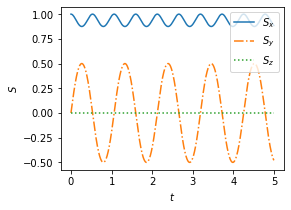

In [203]:
Volkov_Fr()

# Volkov test | Relativistic generalization 

In [9]:
# spin operator
def getSpinOperator_Rel(p):
    """
    Input: Momentum divided by m_e
    Return: Rel spin operator
    """
    gamm = np.sqrt(p.dot(p)/c**2+1)
    P = np.concatenate(([gamm*c], p))
#     print(gam0)
#     print(p/c)
    
    Sigma_x_Rel = -np.matmul(np.matmul(gamma5,gamma1), slash(P))/(2*c)
    Sigma_y_Rel = -np.matmul(np.matmul(gamma5,gamma2), slash(P))/(2*c)
    Sigma_z_Rel = -np.matmul(np.matmul(gamma5,gamma3), slash(P))/(2*c)
#     print(slash(p))
#     print(Sigma_x_Rel)
#     print(Sigma_y_Rel)
#     print(Sigma_z_Rel)
    return Sigma_x_Rel, Sigma_y_Rel, Sigma_z_Rel

def getPsi_Rel(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A = np.concatenate(([0.], A)) # convert 3d to 4d
    A = A.real
#     print(A)
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
    coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(theta)
#     print(phi)
#     print(chi_p)
#     print(coeff)
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # x up
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     print(psi)
#     psi = psi_m


    return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_Rel(psi,p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
#     coeff_conj = psi[3]
#     u_bar = np.matmul(u.conj(),gamma0)
#     psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_Rel_x, S_Rel_y, S_Rel_z = getSpinOperator_Rel(p)
    
    Sx = np.matmul(psi.conj(), np.matmul(S_Rel_x, psi))
    Sy = np.matmul(psi.conj(), np.matmul(S_Rel_y, psi))
    Sz = np.matmul(psi.conj(), np.matmul(S_Rel_z, psi))
    
#     psi_bar = np.matmul(psi.conj(),gamma0)
#     Sx = np.matmul(psi_bar, np.matmul(S_Rel_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(S_Rel_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(S_Rel_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(S_Rel_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(S_Rel_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(S_Rel_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_Rel(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    
    S = np.vstack([getS_Rel(getPsi_Rel(it,x,y,z,px,py,pz,time),p[:,it]) for it in range(len(time))])
#     S = np.vstack([getS_Rel(getPsi_Rel(it,x,y,z,px,py,pz,time),p0) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
#     print(p/c)
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
         'Rel_Gen',ax
        )
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

(1000,)
(1000,)


NameError: name 'Volkov_Rel' is not defined

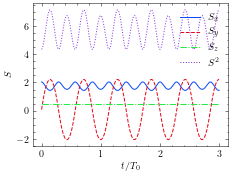

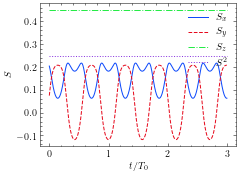

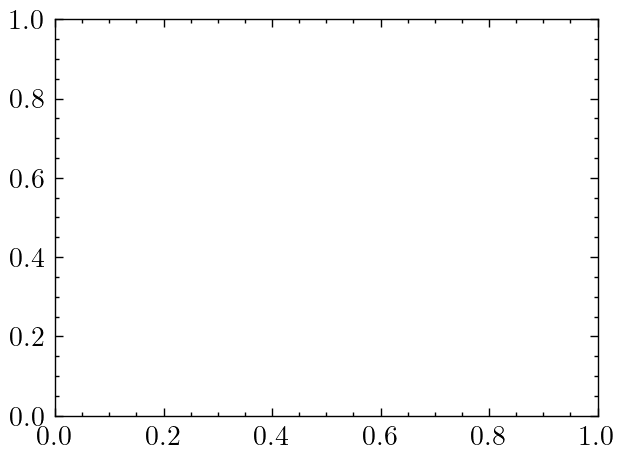

In [18]:
fig, ax = plt.subplots()
BMT(ax)
fig, ax = plt.subplots()
BMT_dzdt(ax)
fig, ax = plt.subplots(dpi=200)
Volkov_Rel(ax)

# Volkov test | Pryce

In [22]:
# spin operator
def getSpinOperator_Pr(p):
    """
    Input: Initial momentum divided by m_e
    Return: Pr spin operator
    """
    
    
    alpha_x = np.matmul(gamma0,gamma1)
    alpha_y = np.matmul(gamma0,gamma2)
    alpha_z = np.matmul(gamma0,gamma3)
#     print(alpha_x, '\n',alpha_y, '\n', alpha_z)
    p_0 = np.sqrt(p.dot(p)+c**2)
    pxalpha1 = p[1]*alpha_z - alpha_y*p[2]
    pxalpha2 = p[2]*alpha_x - alpha_z*p[0]
    pxalpha3 = p[0]*alpha_y - alpha_x*p[1]
    
#     print(p)
    
    Sigma_x_Pr = np.matmul(gamma0,Sigma_x)/2 + np.matmul(dotSigma(p),np.identity(4)-gamma0)*p[0]/p.dot(p)/2 
    Sigma_y_Pr = np.matmul(gamma0,Sigma_y)/2 + np.matmul(dotSigma(p),np.identity(4)-gamma0)*p[1]/p.dot(p)/2
    Sigma_z_Pr = np.matmul(gamma0,Sigma_z)/2 + np.matmul(dotSigma(p),np.identity(4)-gamma0)*p[2]/p.dot(p)/2
#     print(gamma0)
#     print(Sigma_x_Pr)
#     print(Sigma_y_Pr)
#     print(Sigma_z_Pr)
    return Sigma_x_Pr, Sigma_y_Pr, Sigma_z_Pr

# def getPsi(i, x, y, z, px, py, pz, time):
#     z = z[i]
#     x = x[i]
# #     print(z)
#     t = time[i]
    
# #     p = np.array([px[i],py[i],pz[i]])*m_e
#     p = np.array([px[0],py[0],pz[0]])*m_e

#     mag_p = np.sqrt(p.dot(p))
#     Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
#     P = np.concatenate(([Ekin/c],p))
#     _, _, A, k = getField(x, t)
# #     print(A)
#     K = np.concatenate(([wn/c],  k))
    
#     kp = contract(K,P)
#     A = np.concatenate(([0.], A)) # convert 3d to 4d
#     A = A.real
# #     print(A)
#     coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
#     coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
# #     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
# #    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
# #    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
# #    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

#     #chi_p = np.array([1.0, 0.0])
#     #chi_m = np.array([0.0, 1.0])
#     chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
# #     print(theta)
# #     print(phi)
# #     print(chi_p)
# #     print(coeff)
# #     print(chi_p)
#     chi_m = np.array([0.0, 1.0])
    
#     norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
#     u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
# #     print(u_p)
# #     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

#     psi_p = np.matmul(coeff,u_p) # x up
# #     psi_m = np.matmul(coeff,u_m) # x down
# #     psi = (psi_m + psi_p)/np.sqrt(2) # z down
# #     psi = (psi_m - psi_p)/np.sqrt(2) # z up
# #     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
# #     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
#     psi = psi_p
# #     print(psi)
# #     psi = psi_m


#     return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_Pr(psi,p):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_Pr_x, S_Pr_y, S_Pr_z = getSpinOperator_Pr(p)
#     Sx = np.matmul(psi.conj(), np.matmul(S_Pr_x, psi))
#     Sy = np.matmul(psi.conj(), np.matmul(S_Pr_y, psi))
#     Sz = np.matmul(psi.conj(), np.matmul(S_Pr_z, psi))
    psi_bar = np.matmul(psi.conj(),gamma0)
    Sx = np.matmul(psi_bar, np.matmul(S_Pr_x, psi))
    Sy = np.matmul(psi_bar, np.matmul(S_Pr_y, psi))
    Sz = np.matmul(psi_bar, np.matmul(S_Pr_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_Pr(ax):
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
#     print(p.shape)
    
    S = np.vstack([getS_Pr(getPsi(it,x,y,z,px,py,pz,time),p[:,it]) for it in range(len(time))])
#     S = np.vstack([getS_Pr(getPsi(it,x,y,z,px,py,pz,time),p0) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
         'Pryce',ax
        )
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

(1000,)
(1000,)
[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


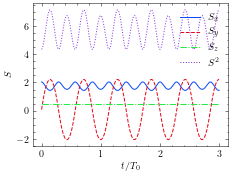

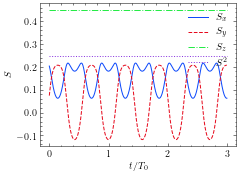

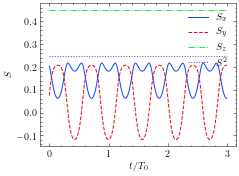

In [23]:
fig, ax = plt.subplots()
BMT(ax)
fig, ax = plt.subplots()
BMT_dzdt(ax)
fig, ax = plt.subplots()
Volkov_Pr(ax)

# Volkov test | Pauli + FV

In [37]:
# spin operator
def getSpinOperator_PFV(p):
    """
    Input: Initial momentum divided by m_e
    Return: PFV spin operator
    """
#     p = np.concatenate(([gam0*c], p))
#     print(gam0)
#     print(p)
    p_0 = gam0*c
    pxgamma1 = p[1]*gamma3 - p[2]*gamma2
    pxgamma2 = p[2]*gamma1 - p[0]*gamma3
    pxgamma3 = p[0]*gamma2 - p[1]*gamma1
    
    Sigma_x_PFV = c**2/2/p.dot(p)*Sigma_x+2*p[0]*dotSigma(p)/p_0/(p_0+c)+1j/p_0*pxgamma1
    Sigma_y_PFV = c**2/2/p.dot(p)*Sigma_y+2*p[1]*dotSigma(p)/p_0/(p_0+c)+1j/p_0*pxgamma2
    Sigma_z_PFV = c**2/2/p.dot(p)*Sigma_z+2*p[2]*dotSigma(p)/p_0/(p_0+c)+1j/p_0*pxgamma3
#     print(slash(p))
#     print(Sigma_x_PFV)
#     print(Sigma_y_PFV)
#     print(Sigma_z_PFV)
    return Sigma_x_PFV, Sigma_y_PFV, Sigma_z_PFV

def getPsi(i, x, y, z, px, py, pz, time):
    z = z[i]
    x = x[i]
#     print(z)
    t = time[i]
    
#     p = np.array([px[i],py[i],pz[i]])*m_e
    p = np.array([px[0],py[0],pz[0]])*m_e

    mag_p = np.sqrt(p.dot(p))
    Ekin = np.sqrt(mag_p**2*c**2 + m_e**2*c**4)
    P = np.concatenate(([Ekin/c],p))
    _, _, A, k = getField(x, t)
#     print(A)
    K = np.concatenate(([wn/c],  k))
    
    kp = contract(K,P)
    A = np.concatenate(([0.], A)) # convert 3d to 4d
    A = A.real
#     print(A)
    coeff = np.identity(4)+(-e)*np.matmul(slash(K),slash(A))/(2*kp)
    coeff_conj = np.identity(4)+(-e)*np.matmul(slash(A),slash(K))/(2*kp)
#     chi_p = np.array([p[0]-1j*p[1],-mag_p-p[2]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#     chi_m = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_m = np.array([-(mag_p-p[2]),p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    chi_p = np.array([mag_p+p[2],p[0]+1j*p[1]])/np.sqrt(2*mag_p*(mag_p+p[2]))
#    norm = np.sqrt((Ekin+m_e*c**2)/(2*Ekin))
#    u_p = norm*np.append(chi_p,mag_p/(Ekin+m_e*c**2)*chi_p) 
#    u_m = norm*np.append(chi_m,-mag_p/(Ekin+m_e*c**2)*chi_m) 

    #chi_p = np.array([1.0, 0.0])
    #chi_m = np.array([0.0, 1.0])
    chi_p = np.array([np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)])
#     print(theta)
#     print(phi)
#     print(chi_p)
#     print(coeff)
#     print(chi_p)
    chi_m = np.array([0.0, 1.0])
    
    norm = np.sqrt((Ekin+m_e*c**2)/(2*m_e*c**2))
    u_p = norm*np.append(chi_p,np.matmul(dotsigma(p),chi_p)*c/(Ekin+m_e*c**2)) 
#     print(u_p)
#     u_m = norm*np.append(chi_m,np.matmul(dotsigma(p),chi_m)/(Ekin+m_e*c**2)) 
    

    psi_p = np.matmul(coeff,u_p) # x up
#     psi_m = np.matmul(coeff,u_m) # x down
#     psi = (psi_m + psi_p)/np.sqrt(2) # z down
#     psi = (psi_m - psi_p)/np.sqrt(2) # z up
#     psi = (psi_m + 1j *psi_p)/np.sqrt(2) # y up
#     psi = (psi_m - 1j* psi_p)/np.sqrt(2) # y down
    psi = psi_p
#     print(psi)
#     psi = psi_m


    return psi, u_p, coeff, coeff_conj

#========== Spin Expectation Value =======================
def getS_PFV(psi):
    u = psi[1]
    u_norm = np.matmul(np.matmul(u.conj(),gamma0),u)
    coeff_conj = psi[3]
    u_bar = np.matmul(u.conj(),gamma0)
    psi_bar = np.matmul(u_bar,coeff_conj)
    
    psi = psi[0]
    S_PFV_x, S_PFV_y, S_PFV_z = getSpinOperator_PFV(p0)
    Sx = np.matmul(psi.conj(), np.matmul(S_PFV_x, psi))
    Sy = np.matmul(psi.conj(), np.matmul(S_PFV_y, psi))
    Sz = np.matmul(psi.conj(), np.matmul(S_PFV_z, psi))
#     Sx = np.matmul(psi_bar, np.matmul(Sigma_x, psi))
#     Sy = np.matmul(psi_bar, np.matmul(Sigma_y, psi))
#     Sz = np.matmul(psi_bar, np.matmul(Sigma_z, psi))
    #norm = np.matmul(psi.conj(),psi)
#     norm = np.matmul(psi.conj(),np.matmul(gamma0,psi))
    norm = np.matmul(np.matmul(psi.conj(),gamma0),psi)
#     return np.array([Sx, Sy, Sz])/norm
    return np.array([Sx, Sy, Sz, norm,u_norm])

def Volkov_PFV():
    #time = np.arange(0,tend,tend/1000.0)    
    traj = np.load('traj.npz')
    x = traj['x']
    y = traj['y']
    z = traj['z']
    px = traj['px']
    py = traj['py']
    pz = traj['pz']
    p = np.array([px,py,pz])
    gam = np.sqrt(p**2/c**2+1)
    
    S = np.vstack([getS_PFV(getPsi(it,x,y,z,px,py,pz,time)) for it in range(len(time))])
    zeta = np.zeros(p.shape)
    s = np.zeros(p.shape)
    
    print([p.shape])
    plot(
         x ,y ,z,
         px,py,pz,
         S[:,0],S[:,1],S[:,2],
         'PFV',
        )
# #     for i in range(len(time)):
# #         zeta[:,i] = np.array((S[i,0],S[i,1],S[i,2]))
# #         s[:,i] = zeta[:,i] + p[:,i]*p[:,i].dot(zeta[:,i])/(c**2*(gam[:,i]+1))
#     plot(
#          x ,y ,z,
#          px,py,pz,
# #          S[:,0],S[:,1],S[:,2],
#          s[0,:],s[1,:],s[2,:],
#         )
    
#     plt.figure()
#     plt.plot(S[:,3])
#     plt.figure()
#     plt.plot(S[:,4])
#=========================================================

/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/merlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/home/merlin/anaconda3/lib/python3.7/site-packages/ipyk

[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


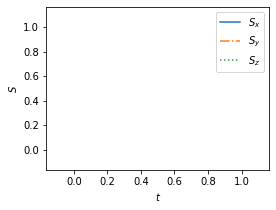

In [19]:
Volkov_PFV()

In [147]:
print(np.identity(4)-gamma0)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]


# Volkov Parameter

In [36]:
################################################################################################
# Constants
bn2=1 # for offset for radiation reaction

# qe = 4.8e-10
# me = 9.1e-28
# c=2.9979e10
# qe = e
# me = m_e
# c = c

w_au2si = 4.13e16
wn = 10*w_au2si
# w_si2gauss =

# lam = 1e-6
# wn = 2*pi*c/lam


# a0 = 7.5e11*e/(m_e*omega*3e8)
# a0 = 10000 / 137 /137
# a0 = 800 / 137 / 10
a0 = 10.5
# a0 = 0.84
# a0 = 0.5
# a0 = 200
print("a0: ",a0)
g_factor = 2.0

# wn = 2*np.pi*c/(1e-4)
kn = wn/c
lam = 2*pi/kn
B0 = a0*m_e*wn/e
E0 = a0*m_e*c*wn/e
A0 = a0*m_e*c/e
re = e*e/(m_e*c*c)/(4*pi*epsilon_0)
E_s = m_e**2*c**3/(e*hbar)
lambda_c = hbar/(m_e*c)

T0 = 2*pi/wn
delta = c/wn

tend = 6*T0

gam0 = 10.
beta0 = np.sqrt(1-1/(gam0*gam0))
mag_p0 = gam0*c*beta0   # CAUTION: this is p/m
# p0 = np.array([-mag_p0,0.0,  0.0])
# theta_p = pi/4 # theta \in [0, pi]
# phi_p   = pi*5/6 # phi \in [0, 2*pi]
theta_p = pi/2 # theta \in [0, pi]
phi_p   = pi # phi \in [0, 2*pi]
p0 = np.array([np.sin(theta_p)*np.cos(phi_p),np.sin(theta_p)*np.sin(phi_p),np.cos(theta_p)])*mag_p0

theta = pi/4 # theta \in [0, pi]
phi   = -pi/4 #pi/2 # phi \in [0, 2*pi]

zeta = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
s = zeta + p0*p0.dot(zeta)/(c**2*(gam0+1))
s = s*(1/2)
zeta = zeta*(1/2)
# s = zeta
print(zeta)
print(s)

time = np.arange(0,tend,tend/1000.0)    
# init_cond = (0.0, 0.0, 0.0,-p0, 0.0, 0.0, gam0,0.0,1.0,0.0)
init_cond1 = (0.0, 0.0, 0.0,  p0[0], p0[1], p0[2], gam0,s[0],s[1],s[2]) # da/dt
init_cond2 = (0.0, 0.0, 0.0,  p0[0], p0[1], p0[2], gam0,zeta[0],zeta[1],zeta[2]) # d zeta/dt
# tend = 10*T0
# tend = 16*B0*qe/wn
# print(tend)
################################################

a0:  10.5
[ 0.25       -0.25        0.35355339]
[ 2.5        -0.25        0.35355339]


# Volkov RUN

In [9]:
# BMT()
# # Eq12()
# Volkov()
# Volkov_FW()
# #Volkov_Fr()
# # Volkov_Rel()
# # Volkov_Pr()
# #Volkov_PFV()


(1000,)
(1000,)
[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


NameError: name 'Volkov_FW_Eq34' is not defined

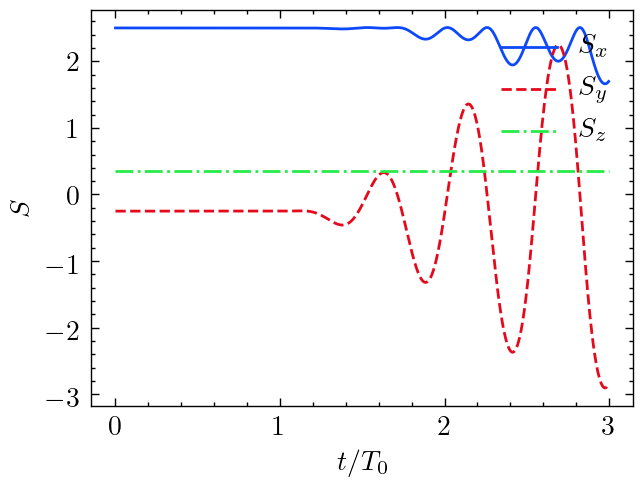

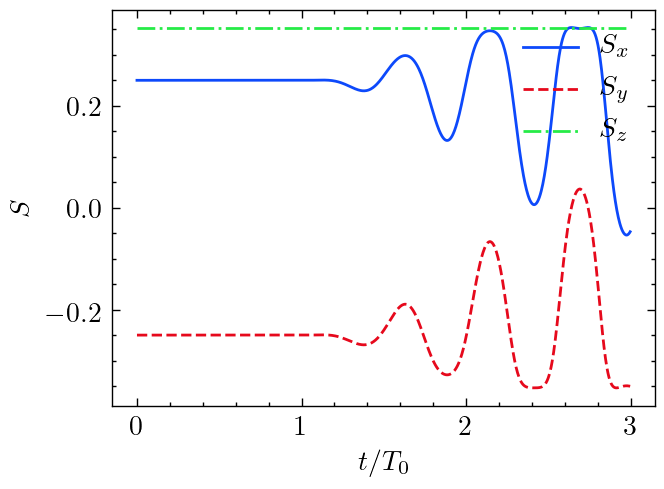

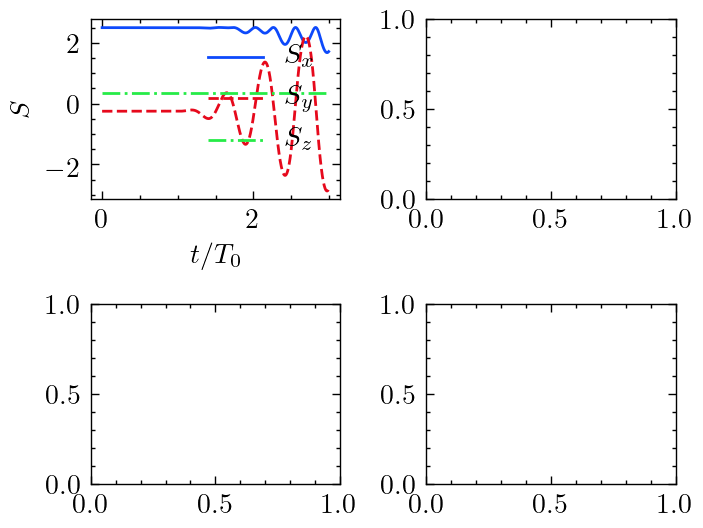

In [29]:
fig, ax = plt.subplots(dpi=200)
BMT(ax)
fig, ax = plt.subplots(dpi=200)
BMT_dzdt(ax)

fig = plt.figure(constrained_layout=True,dpi=200)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
f_ax1 = fig.add_subplot(spec[0, 0])
f_ax2 = fig.add_subplot(spec[0, 1])
f_ax3 = fig.add_subplot(spec[1, 0])
f_ax4 = fig.add_subplot(spec[1, 1])

Volkov(    f_ax1)
Volkov_FW_Eq34( f_ax2)

# Volkov_FW_Eq34_noupdate( f_ax3)
Volkov_Rel( f_ax3)
Volkov_FW( f_ax4)
fig.savefig("img/FW_Eq34.png",dpi=200)

In [46]:
Bc=m_e**2*c**2/(e*hbar)
gam=1
B0=0.01*Bc/

SyntaxError: invalid syntax (<ipython-input-46-81e4839e9554>, line 3)

In [ ]:
hbar

In [89]:
np.sqrt((70*1.99e-24/(m_e)/c)**2+1)

1.122579773439961

(1000,)
[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[(3, 1000)]


/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/merlin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1000,)


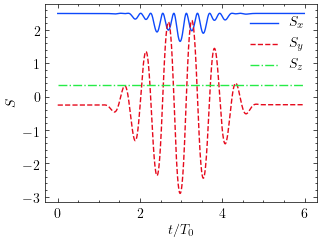

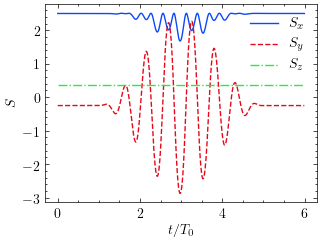

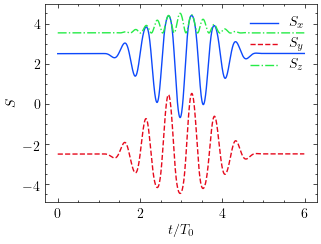

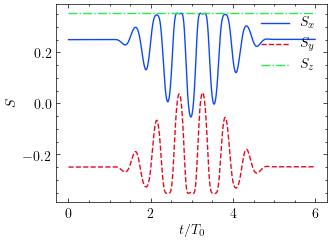

In [37]:
fig, ax = plt.subplots(dpi=100)
BMT(ax)
fig.savefig("BMT.eps")
fig, ax = plt.subplots(dpi=100)
Volkov(ax)
fig.savefig("Pauli.eps")
fig, ax = plt.subplots(dpi=100)
Volkov_FW(ax)
fig.savefig("FW.eps")
fig, ax = plt.subplots(dpi=100)
BMT_dzdt(ax)